In [1]:
import matplotlib.pyplot as plt
import random
import time
random.seed(time.time())

In [2]:
def random_rate_loss(maximum=1):
    return 1 - maximum * random.random()

random_rate_loss(0.2)

0.8998844895874489

# Version 1 理想的指数平滑增长

这个版本非常简单，只是简单的进行按月的多轮迭代。在每一轮迭代中，资产按照固定比例增长，消费也随之增长。

所有的资产都假设购买了某一种理财产品，没有任何风险，并且可以随时取出。

消费也是每年平滑增长，没有任何大笔的突然消费。

收入稳定平滑增长，没有任何意外会导致损失。比如，永远不会失业。但是，收入也不会有任何的爆发性增长。

结果如下。

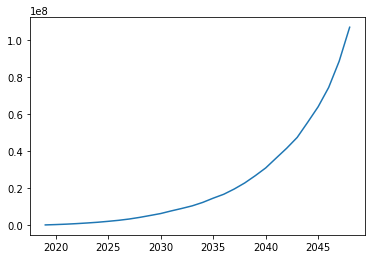

In [10]:
wage_month = 25000
wage_inc_per_year = 0.25
cost_inc_per_year = 0.20
tax_rate = 0.2

bonus = 3 * wage_month * random_rate_loss()

cost_month = 8000

interest_rate = 0.1 / 12

total, year = 0, 2019

year_mem, amount_mem = [], []

while year < 2049:
    month = 1
    while month <= 12:
        total *= (1 + interest_rate * random_rate_loss(0.8))
        total -= cost_month  / random_rate_loss(0.5)
        total += wage_month * (1 - tax_rate)
        month += 1
    total += bonus
    
    # print('In the end of %d, total amount is %.2f' % (year, total))
    year_mem.append(year)
    amount_mem.append(total)
    
    year += 1
    wage_month *= (1+ wage_inc_per_year * random_rate_loss(0.6))
    cost_month *= (1+ cost_inc_per_year * random_rate_loss(0.1))
    
plt.plot(year_mem, amount_mem)

In [ ]:
class Profession(object):
    """
    """
    def __init__(self):
        pass
    
    @property
    def basic_income():
        """
        """
        return self._basic_income
    
    @basic_income.setter
    def basic_income(income):
        """
        """
        if income >= 0:
            self._basic_income = income
        else:
            raise Exception("Error: Income couldn't be negative.") 
            
    @property
    def inc_rate():
        """
        """
        return self._inc_rate
    
    @inc_rate.setter
    def inc_rate(rate):
        """
        """
        self._inc_rate = rate
        
    
    
        
    

    
    
    def draw_chart():
        """
        """
        pass
    

# Version 2 爆发性增长

这个版本中，个人收入近似线形增长。但是，偶尔会出现一些随机因素，会导致大量的收入或者损失。

收入和损失遵循了不同的概率分布。

收入遵循伯努利分布。

损失遵循均匀分布。

通过参数对收入和损失设定倍率。


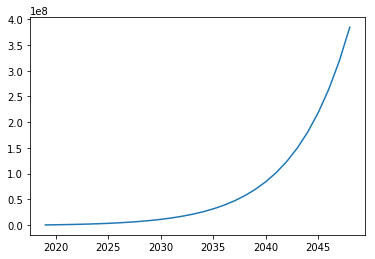

In [7]:
wage_month = 25000
wage_inc_per_year = 0.2
cost_inc_per_year = 0.2
tax_rate = 0.2

bonus = 2.6 * wage_month

cost_month = 7000

interest_rate = 0.1 / 12

total, year = 0, 2019

year_mem, amount_mem = [], []

while year < 2049:
    month = 1
    while month <= 12:
        total *= (1 + interest_rate)
        total -= cost_month
        total += wage_month * (1 - tax_rate)
        month += 1
    total += bonus
    
    # print('In the end of %d, total amount is %.2f' % (year, total))
    year_mem.append(year)
    amount_mem.append(total)
    
    year += 1
    wage_month *= (1+ wage_inc_per_year)
    cost_month *= (1+ cost_inc_per_year)
    
plt.plot(year_mem, amount_mem)